<a href="https://colab.research.google.com/github/saurabh0512/whatsapp_chat_analysis/blob/master/Whatsapp_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install emoji

In [0]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

In [0]:
ou it khdef rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg te
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

### Import data

In [0]:
df = rawToDf('WhatsApp Chat with BT se bachane wale.txt', '12hr')

In [0]:
df.tail()

,date_time,user,msg
6751,2019-12-12 12:15:00,+91 91315 41950,Yes. Labs of course will be on different days....
6752,2019-12-12 12:19:00,+91 80749 20224,Can't we do the class in the morning and be fr...
6753,2019-12-12 12:42:00,Syamantak,Ah i see
6754,2019-12-12 12:44:00,Hariprasad,Is it possible to shift bioinformatics lab to ...
6755,2019-12-12 13:30:00,+91 91315 41950,I don't think so. CIC slots for bioinformatics...


In [0]:
df.shape # no. of msgs

(6756, 3)

In [0]:
me = "Saurabh Chavan"

### Data Cleaning

In [0]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(750, 3)

In [0]:
df["user"].unique()

array(['grp_notif', 'Naveen BT', 'Hariprasad', 'Aviram mandal',
       'Imlilong', 'Milenium BT', 'Mangilal', 'Aman Verma',
       '+91 80749 20224', 'Arpita', 'Debjyoti BT', '+91 74320 92669',
       '+91 91315 41950', '+91 86971 69290', 'Anirudh Mantri',
       'Ishaan Agarwal', '+91 91191 47967', '+91 97321 73555',
       'Syamantak', '+91 88888 78270', 'YASHWANT BT', 'Shreyansh',
       '+91 80038 72748', '+91 89503 81675', 'Shobit BT',
       '+91 97321 26333', 'Divyanshu', '+91 87641 43143', 'Abhishekh BT',
       '+91 99087 47923', '+91 79815 25634', '+91 80745 59764', 'Rasel',
       '+91 90796 36574', 'Ankit Saini', '+91 87641 69367',
       'Saurabh Chavan', '+91 98001 34560', '+91 76021 07070',
       'Saurabh BT', '+91 73844 29578', '+91 90798 18831',
       '+91 70304 07931', '+230 5863 3900', 'Shobit Balotia', 'Arka'],
      dtype=object)

In [0]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(54, 3)

In [0]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [0]:
df.tail()

,date_time,user,msg
6751,2019-12-12 12:15:00,+91 91315 41950,Yes. Labs of course will be on different days....
6752,2019-12-12 12:19:00,+91 80749 20224,Can't we do the class in the morning and be fr...
6753,2019-12-12 12:42:00,Syamantak,Ah i see
6754,2019-12-12 12:44:00,Hariprasad,Is it possible to shift bioinformatics lab to ...
6755,2019-12-12 13:30:00,+91 91315 41950,I don't think so. CIC slots for bioinformatics...


In [0]:
df.reset_index(inplace=True, drop=True)
df.shape

(5952, 3)

## Activity of members throughout the day



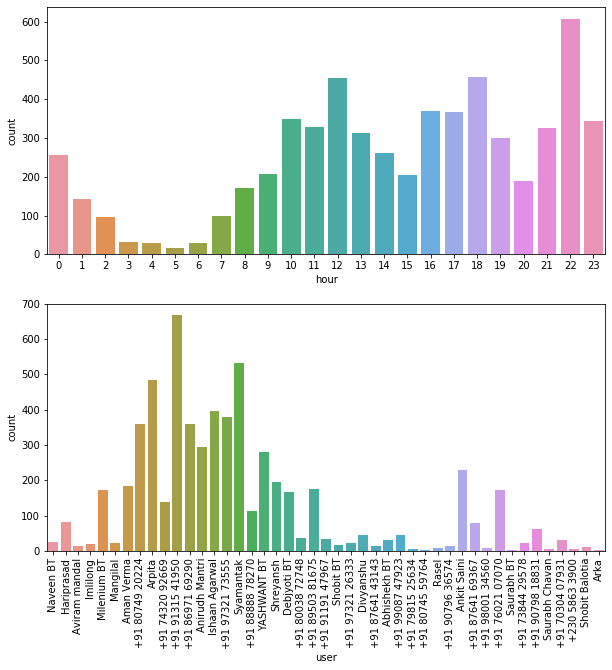

In [0]:
df['hour']=df['date_time'].dt.hour

f, (ax1,ax2)=plt.subplots(2,figsize=(10,10))
plt.xticks(rotation='vertical')
sns.countplot(x=df['hour'],ax=ax1)
sns.countplot(x=df['user'],ax=ax2)

## Q 2) Count of all the emojis that i have used?

In [0]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [0]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

✋ - 1


# Activity during the week of the group

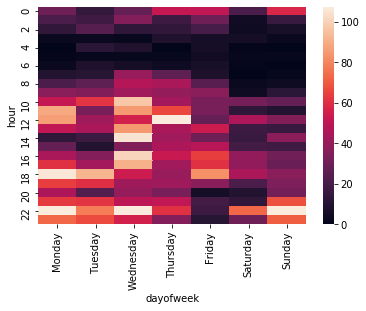

In [0]:
df['dayofweek']=df['date_time'].dt.dayofweek
df['dayofweek'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)
data=df.groupby(['hour','dayofweek'])['msg'].size().reset_index()
data_heat=data.pivot('hour','dayofweek','msg')
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.heatmap(data_heat[days].fillna(0),robust=True)

## Q 7)
## Which are the most common words?

In [0]:
comment_words = ' '
stopwords = STOPWORDS.update(['toh','bhi','kya','hai','ye','ka','nhi','nahi','hi','se','ke','ki','ko','tha','vo','happy','birthday','koi','ka','na','ho','kaha','okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='black',
                stopwords=stopwords,  
                min_font_size = 10).generate(comment_words) 


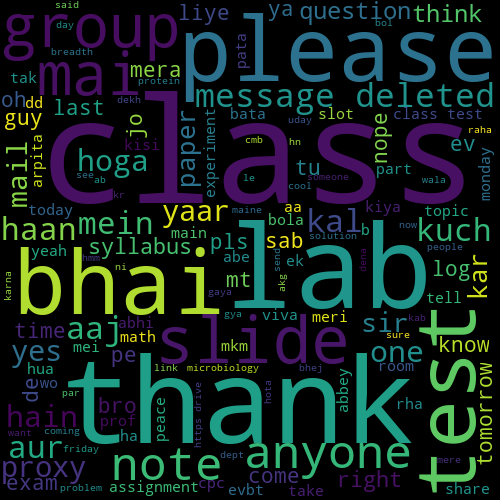

In [0]:
wordcloud.to_image()